# Exploratory data analaysis for IPC data

## Set export to True if you wish to export graphs and tables


In [1]:
export = False
seed = 1337


In [2]:
import warnings
from sklearn.cluster import KMeans
from matplotlib.cm import get_cmap
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from helper_functions import *

warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
df_phase_fews_net = pd.read_csv(
    '../datasets/fews_net_ipc.csv', parse_dates=['date'])
set_index(df_phase_fews_net)

In [4]:
df_ipc = pd.read_csv('../datasets/ipc.csv',
                     parse_dates=['date'], usecols=['date', 'area', 'area_phase'])
df_ipc['area'] = df_ipc['area'].str.lower()
set_index(df_ipc)


In [5]:
df_food_crisis = pd.read_csv('../Datasets/world_bank_processed.csv', parse_dates=['date'])
set_index(df_food_crisis)

In [6]:
df_admin2 = gpd.read_file('../geography/Somalia/Som_Admbnda_Adm2_UNDP.shp')
df_admin2['area'] = df_admin2['admin2Name'].str.lower()
df_admin2.drop(['admin2Name'], axis=1, inplace=True)

In [7]:
df_sum = df_food_crisis.describe().transpose().iloc[:, 1:].round(3)

if export:
    print(df_sum.to_latex())

df_sum

,mean,std,min,25%,50%,75%,max
centx,45.421,2.498,41.429,43.433,45.333,47.222,50.794
centy,5.591,3.529,-0.854,2.679,4.699,9.230,11.668
fews_ipc,2.309,0.786,1.000,2.000,2.000,3.000,5.000
fews_ha,0.207,0.405,0.000,0.000,0.000,0.000,1.000
fews_proj_near,2.328,0.806,1.000,2.000,2.000,3.000,5.000
fews_proj_near_ha,0.071,0.256,0.000,0.000,0.000,0.000,1.000
fews_proj_med,2.269,0.791,1.000,2.000,2.000,3.000,5.000
fews_proj_med_ha,0.034,0.181,0.000,0.000,0.000,0.000,1.000
ndvi_mean,0.252,0.119,0.084,0.162,0.214,0.313,0.719
ndvi_anom,100.120,13.283,48.244,92.494,98.605,106.457,198.571


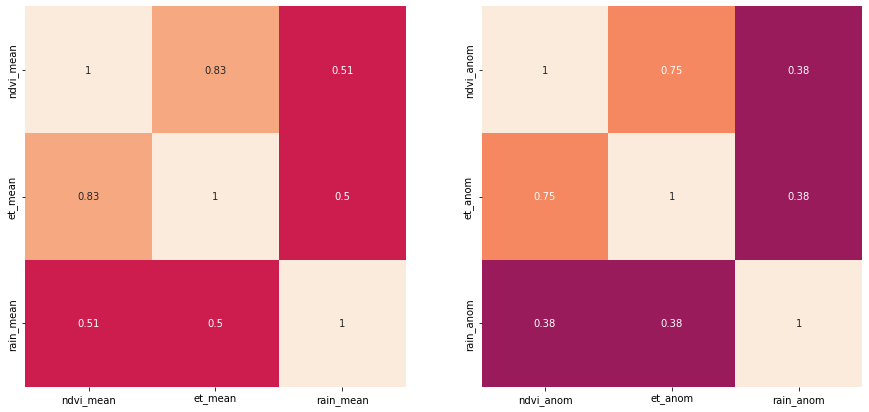

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))


sns.heatmap(df_food_crisis[['ndvi_mean', 'et_mean', 'rain_mean']].corr(
), vmin=0, vmax=1, annot=True, ax=ax[0], cbar=False)
sns.heatmap(df_food_crisis[['ndvi_anom', 'et_anom', 'rain_anom']].corr(
), vmin=0, vmax=1, annot=True, ax=ax[1], cbar=False)

if export:
    plt.savefig('../figures/corr_climate.png', dpi=300, bbox_inches='tight')

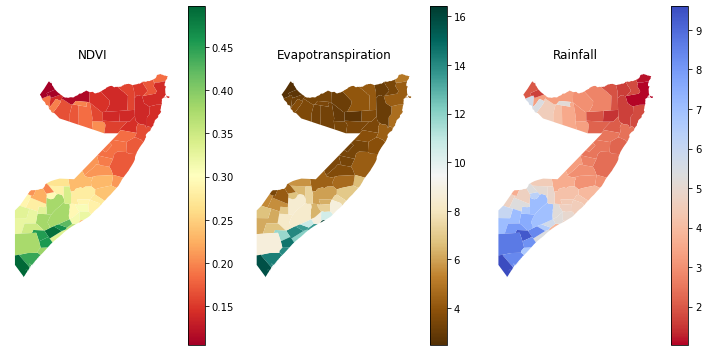

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))

df_mean_rain_area = df_food_crisis.groupby(
    'area')[['ndvi_mean', 'et_mean', 'rain_mean']].mean()
df_plot_phase = df_admin2.merge(
    df_mean_rain_area, left_on='area', right_on=['area'])
df_plot_phase.plot(column='ndvi_mean', cmap='RdYlGn', legend=True, ax=axs[0])
df_plot_phase.plot(column='et_mean', cmap='BrBG', legend=True, ax=axs[1])
df_plot_phase.plot(column='rain_mean', cmap='coolwarm_r',
                   legend=True, ax=axs[2])

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('NDVI')
axs[1].set_title('Evapotranspiration')
axs[2].set_title('Rainfall')


plt.tight_layout()

if export:
    plt.savefig('../Figures/climate_mean_area.png',
                dpi=300, bbox_inches='tight')


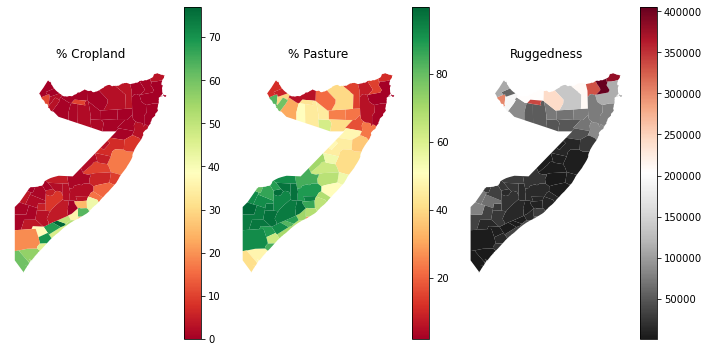

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))

df_mean_rain_area = df_food_crisis.groupby(
    'area')[['cropland_pct', 'pasture_pct', 'ruggedness_mean']].mean()
df_plot_phase = df_admin2.merge(
    df_mean_rain_area, left_on='area', right_on=['area'])
df_plot_phase.plot(column='cropland_pct', cmap='RdYlGn', legend=True, ax=axs[0])
df_plot_phase.plot(column='pasture_pct', cmap='RdYlGn', legend=True, ax=axs[1])
df_plot_phase.plot(column='ruggedness_mean',
                   cmap='RdGy_r', legend=True, ax=axs[2])


axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('% Cropland')
axs[1].set_title('% Pasture')
axs[2].set_title('Ruggedness')


plt.tight_layout()

if export:
    plt.savefig('../figures/agriculture_mean_area.png',
                dpi=300, bbox_inches='tight')


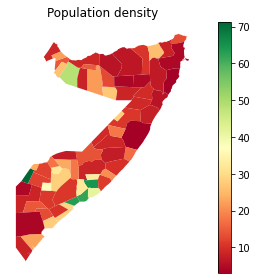

In [11]:
fig, ax = plt.subplots()
df_food_crisis['density'] = df_food_crisis['pop']/df_food_crisis['surface_area']
df_mean_rain_area = df_food_crisis.groupby('area')[['density']].mean()
mask = df_mean_rain_area < df_mean_rain_area.quantile(.95)

df_plot_phase = df_admin2.merge(
    df_mean_rain_area[mask], left_on='area', right_on=['area'])
df_plot_phase.plot(column='density', cmap='RdYlGn', legend=True, ax=ax)


ax.axis('off')

ax.set_title('Population density')


plt.tight_layout()

if export:
    plt.savefig('../figures/average_density.png', dpi=300, bbox_inches='tight')


In [12]:
df_food_crisis.sort_index(inplace=True)

dates = sorted(get_date(df_food_crisis).unique())
n_dates = len(dates)
areas = get_area(df_food_crisis).unique()
n_areas = len(areas)

values_per_area = []
df_food_crisis['normalized_acled'] = df_food_crisis['acled_count']/df_food_crisis['pop']
df_food_crisis['normalized_fatalities'] = df_food_crisis['acled_count']/df_food_crisis['pop']
colnames = ['ndvi_mean', 'et_mean', 'rain_mean', 'p_staple_food', 'normalized_acled', 'normalized_fatalities']

values_per_area = np.zeros([n_areas, n_dates, len(colnames)])
for i, [_, df] in enumerate(df_food_crisis.groupby('area')):
    values_per_area[i] = df[colnames].to_numpy()

In [13]:
cmap = get_cmap('tab10')

def area_level_clustering(values, cluster_range = range(2, 5)):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

    for n in cluster_range:

        kmeans = KMeans(n_clusters=n, random_state=seed).fit(values)
        clusters = kmeans.predict(values)
        df_cluster = pd.DataFrame({'area': areas, 'cluster': clusters})

        df_plot = df_admin2.merge(
            df_cluster, left_on='area', right_on=['area'])
        df_plot.plot(column='cluster', cmap='tab10',
                    ax=ax[n-2, 0], scheme='User_Defined', classification_kwds=dict(bins=range(9)))

        l = []
        for i in range(n):
            ax[n-2, 1].plot(dates, values[clusters == i].T,
                            alpha=0.2, c=cmap(i))
            ax[n-2, 2].plot(dates, values[clusters ==
                            i].T.mean(axis=1), c=cmap(i))

        ax[n-3, 0].axis('off')

    ax[0, 0].set_title('clusters', size=20)
    ax[0, 1].set_title('discrict-level trends', size=20)
    ax[0, 2].set_title('cluster-level trends', size=20)
    
    return fig


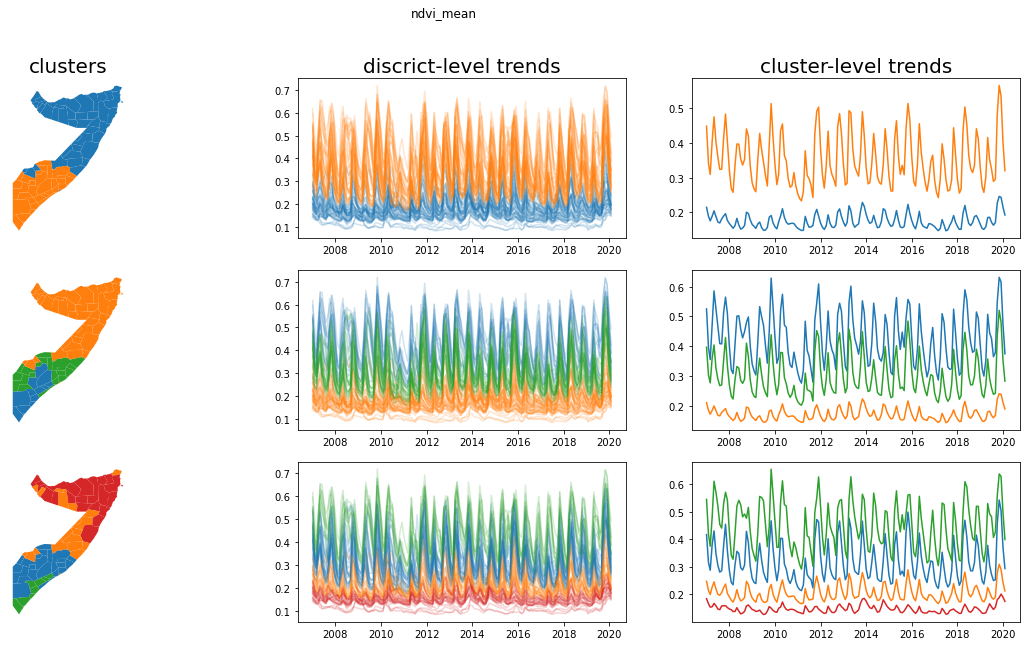

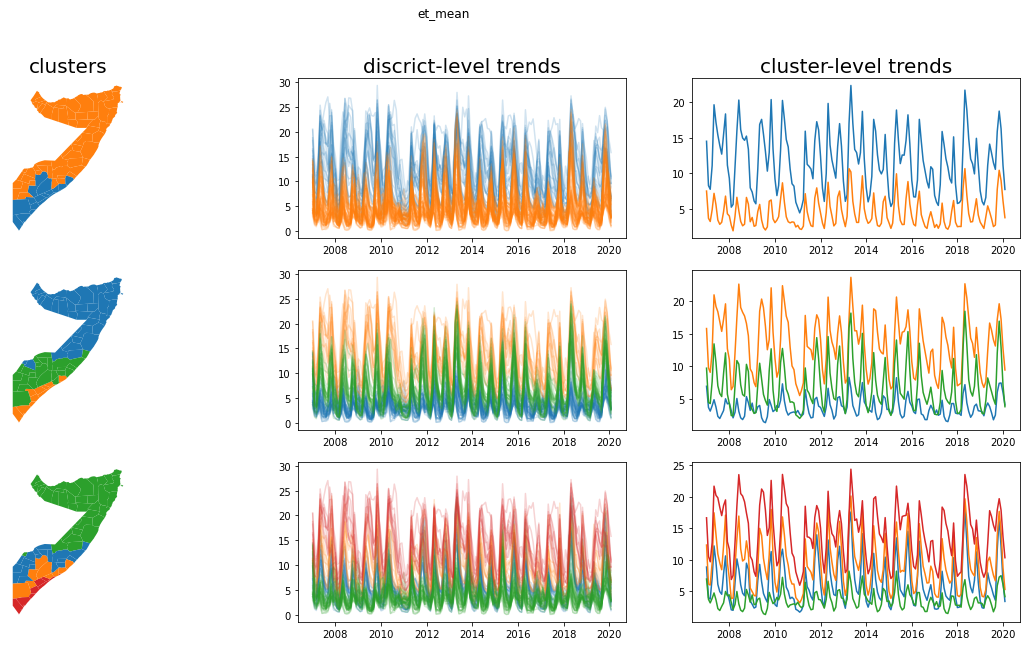

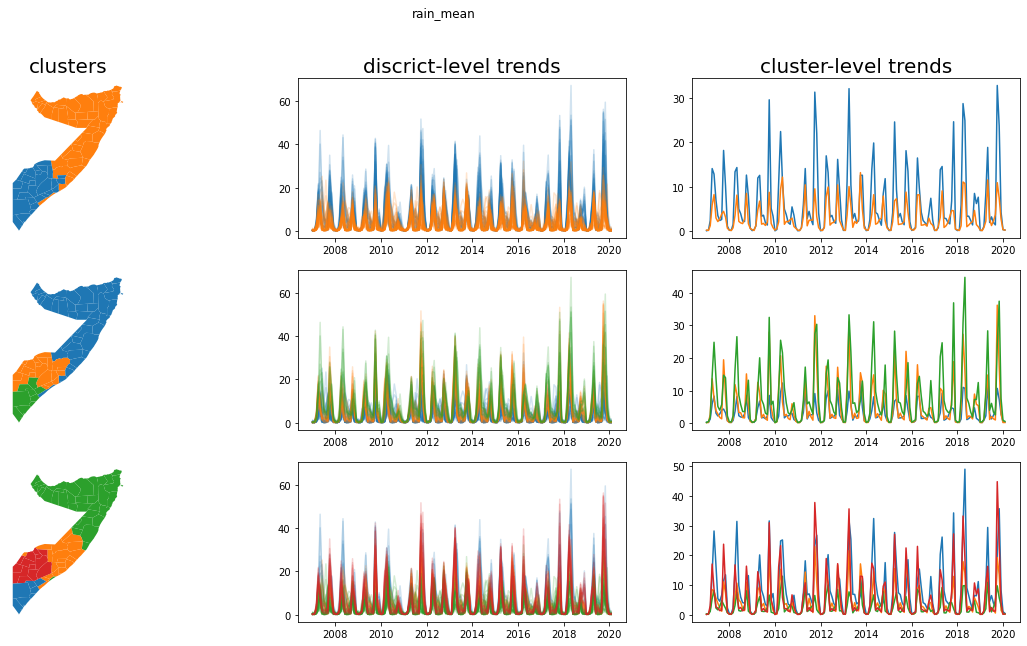

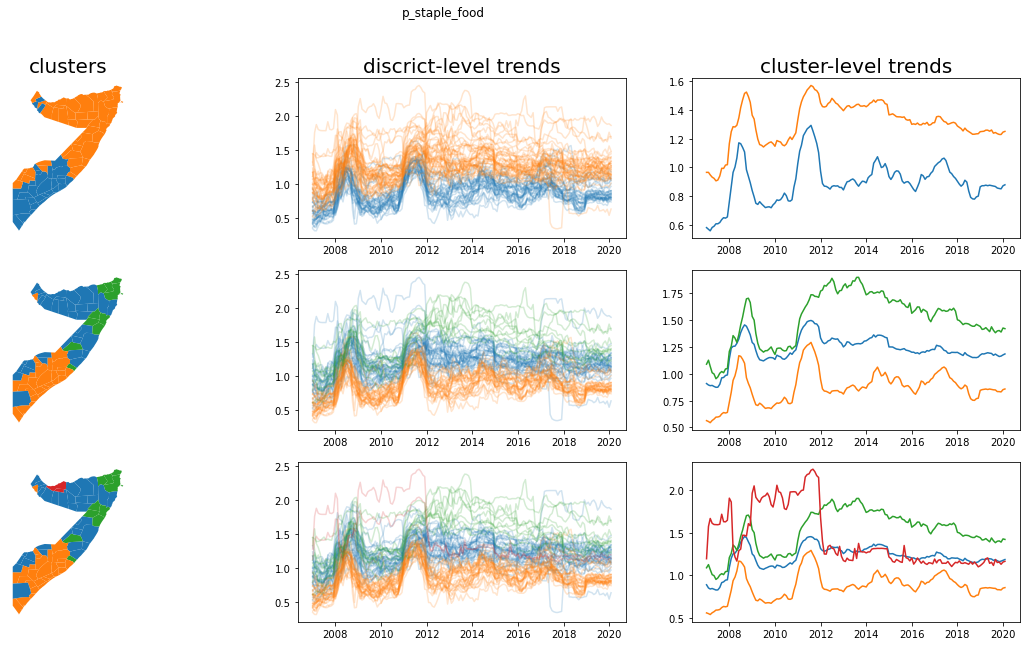

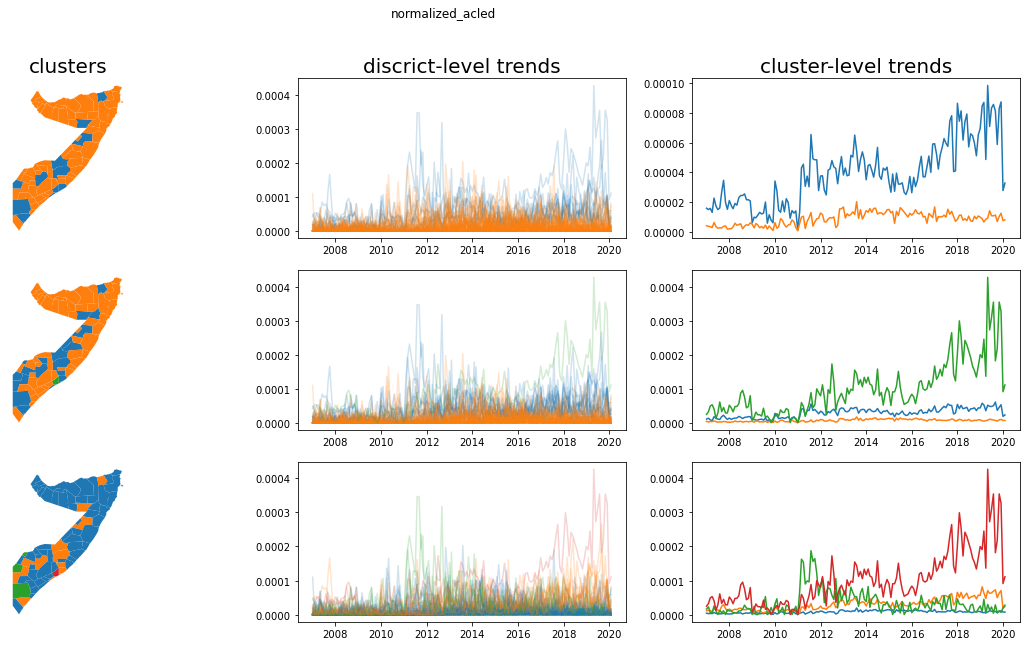

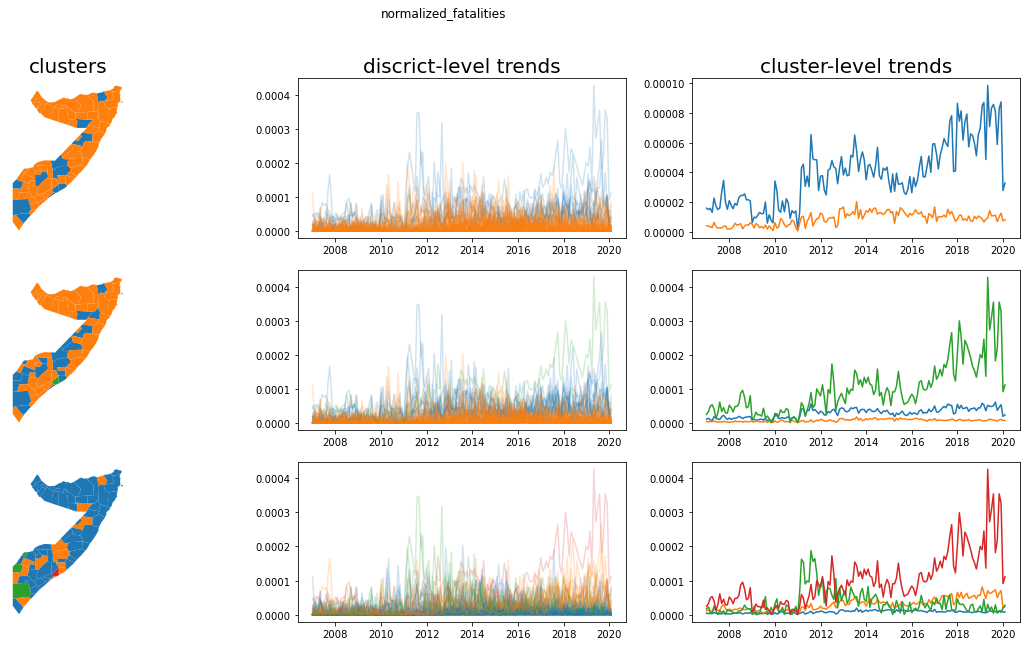

In [14]:
figs = []

for i, colname in enumerate(colnames):
    fig = area_level_clustering(values_per_area[..., i])
    fig.suptitle(colname)
    figs.append(fig)

In [15]:
if export:
 for i, fig in enumerate(figs):
     fig.suptitle('')
     fig.savefig('../figures/clustering_' + colnames[i])   